# **1 Criminal investigation**

**1.2 Most and least frequent outgoing**
1. Identify the 3 numbers with the most counts of outgoing calls.

In [17]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df1 = pd.DataFrame(pd.read_excel('phone_data.xlsx'))
df1.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0


In [3]:
outgoing = df1.loc[df1['Call type'] =='Outgoing']

In [4]:
counts = outgoing.groupby('Number called (to/from)').size().reset_index(name='counts')
counts.sort_values(by='counts',ascending=False, inplace=True)

In [5]:
counts[:3]

,Number called (to/from),counts
0,A_1,111
4,A_5,48
7,B_3,28


2. Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1phone call for many numbers) then identify all numbers.

In [6]:
min = counts.iloc[-1].counts

In [7]:
counts.loc[counts['counts']==min]

,Number called (to/from),counts
26,F_2,1
28,F_4,1
27,F_3,1
24,E_5,1
29,F_5,1
25,F_1,1
16,D_2,1
23,E_4,1
19,D_5,1
15,D_1,1


**1.3 Highest and lowest total duration of outgoing calls**
1. Repeat the same exercise as in the previous subsection, but with the total duration per number called.

In [8]:
sum = outgoing.groupby('Number called (to/from)').sum().Duration.reset_index(name='total_duration')

In [9]:
sum.sort_values(by='total_duration',ascending=False, inplace=True)
sum[:3]

,Number called (to/from),total_duration
0,A_1,1146
4,A_5,427
3,A_4,96


In [10]:
min2 = sum.iloc[-1].total_duration
sum.loc[sum['total_duration']==min2]

,Number called (to/from),total_duration
19,D_5,1
23,E_4,1
24,E_5,1
10,C_1,1


**1.4 Location of outgoing calls**
1. What are the number of counts for every location of outgoing calls?

In [11]:
location = outgoing.groupby(['From city','To city']).size().reset_index(name='counts')

In [12]:
location

,From city,To city,counts
0,CLAREMONT ON,OAK RIDGES ON,1
1,NEWMARKET ON,NEWMARKET ON,1
2,NEWMARKET ON,TORONTO ON,1
3,TORONTO ON,800 SERV SERV 800 ON,1
4,TORONTO ON,866 SERV SERV 866 ON,1
5,TORONTO ON,877 SERV SERV 877 ON,1
6,TORONTO ON,888 SERV SERV 888 ON,1
7,TORONTO ON,AURORA ON,1
8,TORONTO ON,OAK RIDGES ON,27
9,TORONTO ON,RICHMONDHL ON,10


**1.5 Incoming and Outgoing calls pattern**
1. Calculate the total duration of incoming and outgoing calls per month.

In [15]:
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
tot_duration = df1.groupby(by = ['Month','Call type']).sum().Duration.reset_index(name='total_duration')
duration = pd.pivot_table(tot_duration, values='total_duration', index=['Month'], columns=['Call type'])
duration

Call type,Incoming,Outgoing
Month,,
7,84,190
8,54,281
9,244,714
10,63,621
11,87,196


2. Plot the results in one graph for both incoming and outgoing calls.

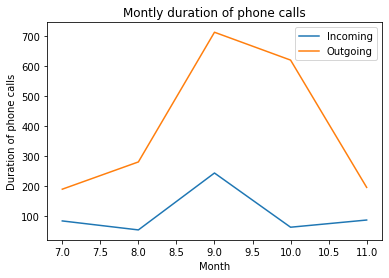

In [20]:
plt.plot(duration.index,duration)
plt.title( 'Total duration of incoming and outgoing calls per month')
plt.ylabel('Duration')
plt.xlabel('Month')
plt.legend(duration.columns)
plt.show()

3. Do you see anything unusual in the pattern? E.g. does this look like a phone line that was used for criminal activities or more like a personal phone?

From the above diagram, we can see that the outgoing call is far more than incoming call. I think duration time cannot determine whether the phone line is personal or criminal, since there are a lot of career that need to make phone call, eg.customer service of fido,rogers etc. They also need to make a lot of phone call especially during the September since school are open they need to sell their student special combo.

**1.6 Distribution of calls**

Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client called, y-axis: number of clients called.

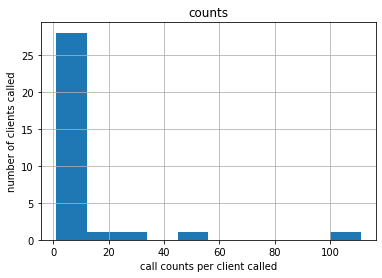

In [23]:
counts.hist(column = 'counts')
plt.xlabel('call counts per client called')
plt.ylabel('number of clients called')
plt.show()

# **2 The ergodicity problem in economics**


**2.3 Coding the problem**
1. Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function. Set N=100 coin tosses and w=100 gamblers and add the
prefix ’prob ’ to the column name.

In [47]:
np.random.seed(6)

In [48]:
N = 100 
w = 100
prob_tab = pd.DataFrame(data = np.random.rand(N,w)).add_prefix('prob_')
prob_tab.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.892860,0.331980,0.821229,0.041697,0.107657,0.595052,0.529817,0.418807,0.335408,0.622519,...,0.117033,0.710450,0.204523,0.490368,0.036609,0.315404,0.863030,0.558467,0.546708,0.367825
1,0.828157,0.276350,0.125658,0.562781,0.267339,0.775035,0.179406,0.783257,0.607996,0.041749,...,0.207089,0.745055,0.455688,0.113510,0.215324,0.930243,0.007895,0.641872,0.644663,0.680251
2,0.578153,0.784528,0.821847,0.646829,0.179640,0.726273,0.284712,0.841477,0.570167,0.085268,...,0.278835,0.728600,0.319693,0.152541,0.984878,0.261630,0.608627,0.917585,0.642990,0.426780
3,0.397216,0.048907,0.081247,0.450680,0.922319,0.233369,0.868859,0.806227,0.174154,0.312377,...,0.803403,0.463324,0.772355,0.748819,0.450692,0.283371,0.142490,0.910084,0.079106,0.725661
4,0.077682,0.669955,0.060294,0.111254,0.475343,0.080958,0.031953,0.639617,0.895174,0.483233,...,0.042374,0.320854,0.209889,0.574320,0.958387,0.216798,0.329123,0.266117,0.271063,0.687094


2. Initialize an additional w columns [’balance ’ + str(x)] with the value 100 to capture the initial wealth of 100✩, where: x in range(0, w).

In [49]:
balance_tab = pd.DataFrame(100*np.ones((N,w))).add_prefix('balance_')
df2 = pd.concat([prob_tab,balance_tab],axis = 1)
df2

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.892860,0.331980,0.821229,0.041697,0.107657,0.595052,0.529817,0.418807,0.335408,0.622519,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.828157,0.276350,0.125658,0.562781,0.267339,0.775035,0.179406,0.783257,0.607996,0.041749,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.578153,0.784528,0.821847,0.646829,0.179640,0.726273,0.284712,0.841477,0.570167,0.085268,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.397216,0.048907,0.081247,0.450680,0.922319,0.233369,0.868859,0.806227,0.174154,0.312377,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.077682,0.669955,0.060294,0.111254,0.475343,0.080958,0.031953,0.639617,0.895174,0.483233,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003079,0.642173,0.247647,0.591045,0.126985,0.220814,0.074367,0.348933,0.075217,0.077269,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
96,0.991953,0.405435,0.901111,0.252316,0.116812,0.797491,0.985660,0.515101,0.214411,0.733381,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
97,0.275068,0.180428,0.660792,0.946434,0.805224,0.640613,0.931478,0.118274,0.913525,0.242573,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
98,0.056535,0.064978,0.348158,0.515276,0.599935,0.378086,0.599495,0.359790,0.157572,0.685180,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


3. Create a two-level for loop that iterates through rows 1 to N first and columns w to 2×w next implementing the calculation logic for every prob-balance pair:

In [50]:
for i in range(N-1):
  for j in range(w,2*w):
    if df2.iloc[i,j-w] >= 0.5:
      df2.iloc[i+1,j] = df2.iloc[i,j]*1.5
    if df2.iloc[i,j-w] < 0.5:
      df2.iloc[i+1,j] = df2.iloc[i,j]*0.6

In [51]:
df2

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.892860,0.331980,0.821229,0.041697,0.107657,0.595052,0.529817,0.418807,0.335408,0.622519,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.828157,0.276350,0.125658,0.562781,0.267339,0.775035,0.179406,0.783257,0.607996,0.041749,...,60.000000,150.000000,60.000000,60.000000,60.000000,60.000000,150.000000,150.000000,150.000000,60.000000
2,0.578153,0.784528,0.821847,0.646829,0.179640,0.726273,0.284712,0.841477,0.570167,0.085268,...,36.000000,225.000000,36.000000,36.000000,36.000000,90.000000,90.000000,225.000000,225.000000,90.000000
3,0.397216,0.048907,0.081247,0.450680,0.922319,0.233369,0.868859,0.806227,0.174154,0.312377,...,21.600000,337.500000,21.600000,21.600000,54.000000,54.000000,135.000000,337.500000,337.500000,54.000000
4,0.077682,0.669955,0.060294,0.111254,0.475343,0.080958,0.031953,0.639617,0.895174,0.483233,...,32.400000,202.500000,32.400000,32.400000,32.400000,32.400000,81.000000,506.250000,202.500000,81.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003079,0.642173,0.247647,0.591045,0.126985,0.220814,0.074367,0.348933,0.075217,0.077269,...,0.000695,0.424179,647.245833,0.067869,2.651119,0.004344,2.651119,0.169672,6.627797,103.559333
96,0.991953,0.405435,0.901111,0.252316,0.116812,0.797491,0.985660,0.515101,0.214411,0.733381,...,0.001042,0.636269,388.347500,0.101803,3.976678,0.002606,3.976678,0.254507,3.976678,155.339000
97,0.275068,0.180428,0.660792,0.946434,0.805224,0.640613,0.931478,0.118274,0.913525,0.242573,...,0.000625,0.381761,582.521250,0.061082,2.386007,0.001564,2.386007,0.152704,2.386007,93.203400
98,0.056535,0.064978,0.348158,0.515276,0.599935,0.378086,0.599495,0.359790,0.157572,0.685180,...,0.000375,0.572642,349.512750,0.091623,1.431604,0.000938,3.579011,0.229057,3.579011,139.805100


4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate how many gamblers have more than their initial 100✩. What happens when you increase N to 1,000 (Figure 2 in the original paper, except the red and blue line)? How many gamblers with more than 100✩ do you have at t=1,000?

15 gambler with inital more than 100 dollar and there is no gamblers with more than 100 when t = 1000

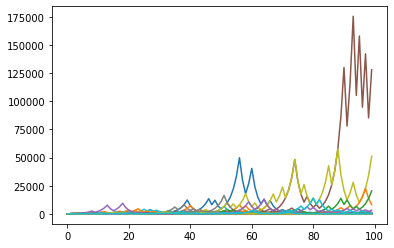

In [52]:
balance_plot = df2.iloc[:,w:]
balance_plot.plot(legend=None)

In [53]:
(balance_plot.iloc[N-1]>100).sum()

15

In [ ]:
N = 1000
prob_tab1 = pd.DataFrame(data = np.random.rand(N,w)).add_prefix('prob_')
balance_tab1 = pd.DataFrame(100*np.ones((N,w))).add_prefix('balance_')
df3 = pd.concat([prob_tab1,balance_tab1],axis = 1)
for i in range(N-1):
  for j in range(w,2*w):
    if df3.iloc[i,j-w] >= 0.5:
      df3.iloc[i+1,j] = df3.iloc[i,j]*1.5
    if df3.iloc[i,j-w] < 0.5:
      df3.iloc[i+1,j] = df3.iloc[i,j]*0.6


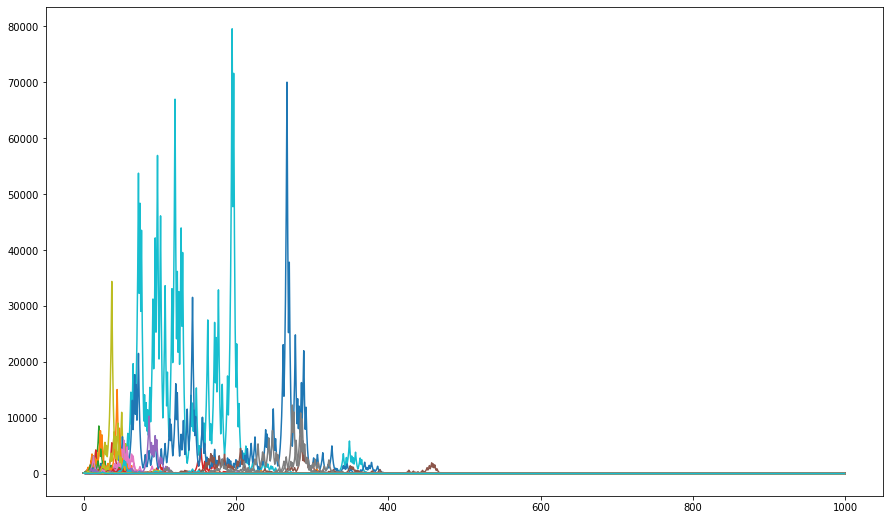

In [60]:
balance_plot = df3.iloc[:,w:]
balance_plot.plot(figsize = (15,9),legend=None)

In [61]:
(balance_tab1.iloc[N-1]>100).sum()

0

5. Plot the time trajectories of the mean and median wealth at every time point from 0 to 1,000. Try both linear and logarithmic scaler for the wealth axis. What are your observations?

In [66]:
df4 = pd.DataFrame(pd.concat([balance_plot.mean(axis=1),balance_plot.median(axis=1)],axis=1))
df4.columns = ['mean','median']

In [67]:
df4

,mean,median
0,1.000000e+02,1.000000e+02
1,1.014000e+02,6.000000e+01
2,1.075500e+02,9.000000e+01
3,1.121580e+02,5.400000e+01
4,1.102815e+02,8.100000e+01
...,...,...
995,1.008239e-09,1.088124e-21
996,6.049907e-10,1.632186e-21
997,3.949223e-10,9.793117e-22
998,5.847367e-10,1.468968e-21


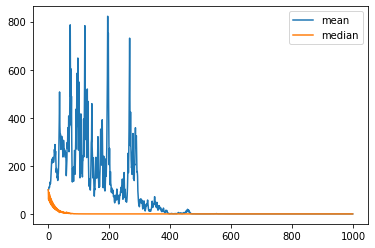

In [69]:
df4.plot()
plt.show()

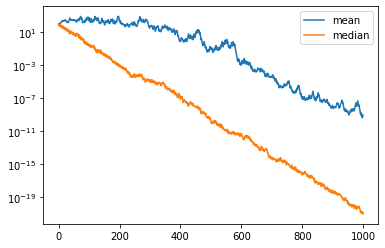

In [70]:
df4.plot()
plt.yscale('log')
plt.show()

From the linear plot, mean of those balance have several peaks but total trend is decreasing. The median of those balance decrease rapidly at first but have barely no change after that decreasing.

For log plot, amplitude for mean's peaks are small and can clearly see the trend is decreasing. For the median the relationship between tosse and log(median) seems linear and log(median) decreasing with tosse increase.

6. Repeat steps 3-5 with N=10 and w=1,000 with the following logic:

In [71]:
N = 10
w = 1000
prob_tab2 = pd.DataFrame(data = np.random.rand(N,w)).add_prefix('prob_')
balance_tab2 = pd.DataFrame(100*np.ones((N,w))).add_prefix('balance_')
df5 = pd.concat([prob_tab2,balance_tab2],axis=1)
for i in range(N-1):
  for j in range(w,2*w):
    if df5.iloc[i,j-w] >= 0.5:
      df5.iloc[i+1,j] = df5.iloc[i,j] + 50
    if df5.iloc[i,j-w] < 0.5:
      df5.iloc[i+1,j] = df5.iloc[i,j] - 40
balance_plot = df5.iloc[:,w:]
balance_plot

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,150.0,150.0,150.0,60.0,60.0,60.0,150.0,60.0,60.0,...,60.0,150.0,60.0,60.0,60.0,60.0,60.0,60.0,150.0,60.0
2,20.0,110.0,110.0,200.0,110.0,20.0,20.0,200.0,110.0,110.0,...,20.0,200.0,20.0,20.0,110.0,20.0,20.0,20.0,200.0,20.0
3,-20.0,160.0,160.0,250.0,160.0,-20.0,-20.0,250.0,70.0,160.0,...,-20.0,160.0,-20.0,70.0,70.0,-20.0,70.0,70.0,250.0,-20.0
4,-60.0,120.0,210.0,300.0,210.0,30.0,30.0,210.0,120.0,120.0,...,-60.0,210.0,30.0,30.0,30.0,-60.0,120.0,30.0,300.0,-60.0
5,-10.0,170.0,260.0,260.0,170.0,-10.0,80.0,260.0,80.0,170.0,...,-10.0,260.0,80.0,-10.0,80.0,-100.0,80.0,-10.0,260.0,-100.0
6,40.0,130.0,310.0,220.0,220.0,-50.0,130.0,220.0,130.0,220.0,...,40.0,220.0,40.0,40.0,130.0,-50.0,40.0,-50.0,310.0,-140.0
7,0.0,90.0,270.0,180.0,270.0,-90.0,90.0,270.0,180.0,270.0,...,0.0,180.0,90.0,0.0,90.0,0.0,0.0,-90.0,270.0,-180.0
8,-40.0,140.0,230.0,230.0,230.0,-40.0,50.0,230.0,140.0,230.0,...,-40.0,230.0,50.0,-40.0,140.0,50.0,-40.0,-40.0,320.0,-220.0
9,-80.0,190.0,190.0,190.0,280.0,-80.0,10.0,190.0,100.0,280.0,...,-80.0,280.0,10.0,-80.0,190.0,10.0,-80.0,-80.0,280.0,-260.0


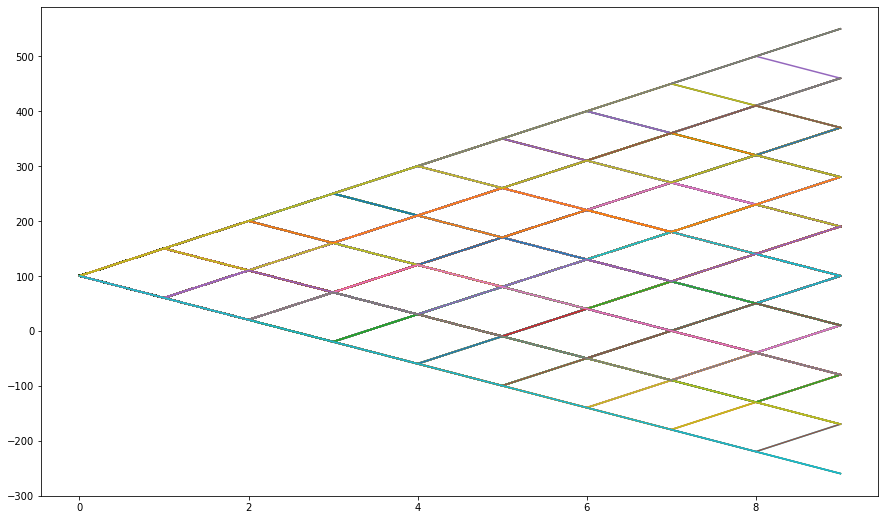

In [73]:
balance_plot.plot(figsize=(15,9),legend=None)
plt.show()

In [75]:
(balance_plot.iloc[N-1] > 100).sum()

483

483 gamblers have more than 100 dollar

In [76]:
N = 1000
prob_tab3 = pd.DataFrame(data = np.random.rand(N,w)).add_prefix('prob_')
balance_tab3 = pd.DataFrame(100*np.ones((N,w))).add_prefix('balance_')
df6 = pd.concat([prob_tab3,balance_tab3],axis = 1)
for i in range(N-1):
  for j in range(w,2*w):
    if df6.iloc[i,j-w] >= 0.5:
      df6.iloc[i+1,j] = df6.iloc[i,j] + 50
    if df6.iloc[i,j-w] < 0.5:
      df6.iloc[i+1,j] = df6.iloc[i,j] - 40

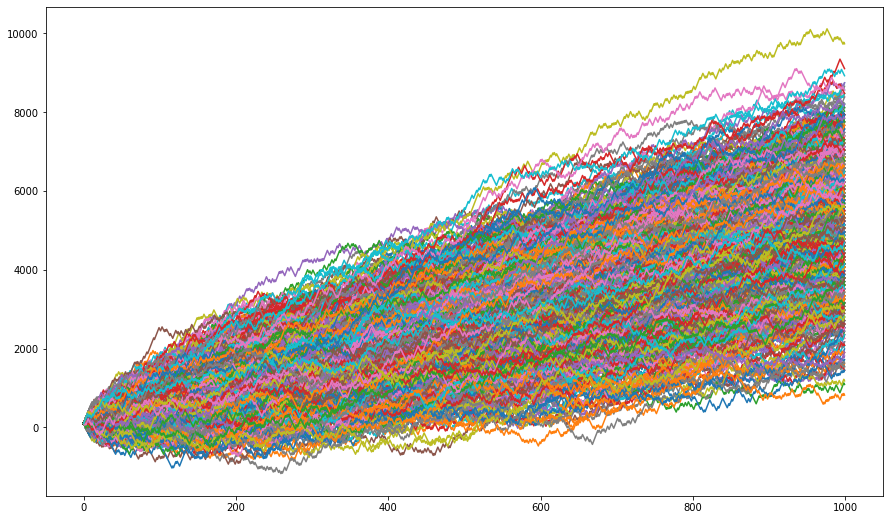

In [77]:
balance_plot = df6.iloc[:,w:]
balance_plot.plot(figsize = (15,9),legend=None)

In [78]:
(balance_plot.iloc[N-1] > 100).sum()

1000

All gamblers have the initial with more than 100 dollar when t = 1000

In [81]:
balance_plot1 = df5.iloc[:,w:]
balance_plot1

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,150.0,150.0,150.0,60.0,60.0,60.0,150.0,60.0,60.0,...,60.0,150.0,60.0,60.0,60.0,60.0,60.0,60.0,150.0,60.0
2,20.0,110.0,110.0,200.0,110.0,20.0,20.0,200.0,110.0,110.0,...,20.0,200.0,20.0,20.0,110.0,20.0,20.0,20.0,200.0,20.0
3,-20.0,160.0,160.0,250.0,160.0,-20.0,-20.0,250.0,70.0,160.0,...,-20.0,160.0,-20.0,70.0,70.0,-20.0,70.0,70.0,250.0,-20.0
4,-60.0,120.0,210.0,300.0,210.0,30.0,30.0,210.0,120.0,120.0,...,-60.0,210.0,30.0,30.0,30.0,-60.0,120.0,30.0,300.0,-60.0
5,-10.0,170.0,260.0,260.0,170.0,-10.0,80.0,260.0,80.0,170.0,...,-10.0,260.0,80.0,-10.0,80.0,-100.0,80.0,-10.0,260.0,-100.0
6,40.0,130.0,310.0,220.0,220.0,-50.0,130.0,220.0,130.0,220.0,...,40.0,220.0,40.0,40.0,130.0,-50.0,40.0,-50.0,310.0,-140.0
7,0.0,90.0,270.0,180.0,270.0,-90.0,90.0,270.0,180.0,270.0,...,0.0,180.0,90.0,0.0,90.0,0.0,0.0,-90.0,270.0,-180.0
8,-40.0,140.0,230.0,230.0,230.0,-40.0,50.0,230.0,140.0,230.0,...,-40.0,230.0,50.0,-40.0,140.0,50.0,-40.0,-40.0,320.0,-220.0
9,-80.0,190.0,190.0,190.0,280.0,-80.0,10.0,190.0,100.0,280.0,...,-80.0,280.0,10.0,-80.0,190.0,10.0,-80.0,-80.0,280.0,-260.0


In [84]:
df7 = pd.DataFrame(pd.concat([balance_plot1.mean(axis=1),balance_plot1.median(axis=1)],axis=1))
df7.columns = ['mean','median']

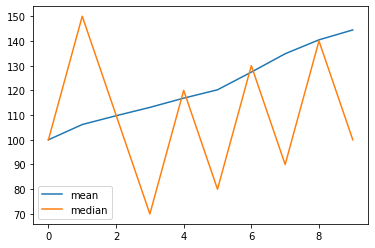

In [85]:
df7.plot()
plt.show()

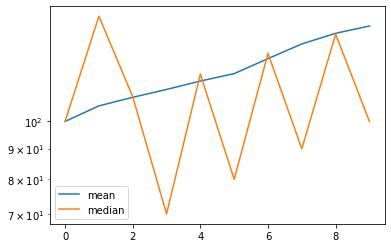

In [86]:
df7.plot()
plt.yscale('log')
plt.show()

The linear result is difference with previous plot, the trend for two value is increasing. and the mean seems more linear and median show some peaks.

The log scale result, the median did not show the linear relation and also both of them are increasing.

Excpet the trend, the same behaviour of linear plot and log plot may because of the lack of tosse( sample number)